# Camera

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](ここに以下の書式でURLを入れる) 
[![github](https://badgen.net/badge/:status/View%20On%20Github/black?icon=github&label)](https://github.com/AtomScott/SoccerTrack)
[![badge](https://img.shields.io/badge/launch-binder-579ACA.svg?logo=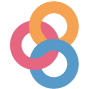)](https://)

## Basic `Camera` use

The `Camera` class acts as a simple video reader. Give it a path to a video file and it will read it.

In [1]:
import sportslabkit as slk

# Get a video
dataset_path = slk.datasets.get_path("wide_view")
path_to_mp4 = sorted(dataset_path.glob("videos/*.mp4"))[0]

cam = slk.Camera(path_to_mp4)

frame = cam[0]  # Get the first frame
print(frame.shape)

(1000, 6500, 3)


---

> Warning: The functions below are still a work in progress and are subject to API changes.

## Advanced Camera setup

SportsLabKit is designed to use either a single camera or multiple cameras. In this example we will use a two camera setup. 

For each camera the following information is required in the yaml file:

* `label` - a unique label for the camera. Either `Left` or `Right` is used in this example.
* `video_path` - The path to the video file.
* `keypoint_xml` - The path to the xml file containing the keypoints.
* `calibration_video_path` - The path to the video file used for calibration.
* `x_range` - The x range of the camera.
* `y_range` - The y range of the camera.
* `camera_matrix` - The camera matrix of the camera.
* `camera_matrix_path` - The path to the camera matrix file.
* `distortion_coefficients` - The distortion coefficients of the camera.
* `distortion_coefficients_path` - The path to the distortion coefficients file.


Note that usually a multicamera setup can be used to drastically improve the performance of the tracking by methods such as triangulation. However, this is not implemented yet.

### Defining the camera ranges

First, the range that each camera is resposible for handling detections for is defined. This is done by defining the x and y ranges in the yaml file.

![](./assets/cam_area.png)

In the example above, the `Blue Cam` is responsible for the x range from 0~52.5 and the `Red Cam` is responsible for the x range from 52.5~105. The y range is defined as the same, 0~68, for both cameras.

In the yaml file this will be defined as:

```yaml
- label: Blue Cam
  x_range:
  - 0
  - 52.5
  y_range:
  - 0
  - 68

- label: Red Cam
  x_range:
  - 52.5
  - 105
  y_range:
  - 0
  - 68

```
Although not at all perfect, this setup allows the number of cameras to be increased to multiple cameras or decresed to one wide angle camera.

In [2]:
import sportslabkit as slk

cfg = slk.utils.load_config('./assets/config.yml')
slk.logger.inspect(cfg)

inspect:0137  💬| Inspecting: ({'cameras': [{'label': 'left', 'video_path': '../../data/raw/left_camera.mp4', 'keypoint_xml': '../../data/raw/left_keypoints.xml', 'calibration_video_path': '../../data/raw/left_checkerboard_images/', 'x_range': [0, 52.5], 'y_range': [0, 68], 'camera_matrix': None, 'camera_matrix_path': None, 'distortion_coefficients': None, 'distortion_coefficients_path': None}, {'label': 'right', 'video_path': '../../data/raw/right_camera.mp4', 'keypoint_xml': '../../data/raw/right_keypoints.xml', 'calibration_video_path': '../../data/raw/right_checkerboard_images/', 'x_range': [52.5, 105], 'y_range': [0, 68], 'camera_matrix': None, 'camera_matrix_path': None, 'distortion_coefficients': None, 'distortion_coefficients_path': None}], 'detection': {'model_name': 'yolov5x', 'size': 3000, 'batch_size': 1, 'filter_range': True}, 'outdir': '../../data/processed/'},) 


╭─────────────────────────────────── <class 'omegaconf.dictconfig.DictConfig'> ───────────────────────────────────╮
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ {'cameras': [{'label': 'left', 'video_path': '../../data/raw/left_camera.mp4', 'keypoint_xml':              │ │
│ │ '../../data/raw/left_keypoints.xml', 'calibration_video_path': '../../data/raw/left_checkerboard_images/',  │ │
│ │ 'x_range': [0, 52.5], 'y_range': [0, 68], 'camera_matrix': None, 'camera_matrix_path': None,                │ │
│ │ 'distortion_coefficients': None, 'distortion_coefficients_path': None}, {'label': 'right', 'video_path':    │ │
│ │ '../../data/raw/right_camera.mp4', 'keypoint_xml': '../../data/raw/right_keypoints.xml',                    │ │
│ │ 'calibration_video_path': '../../data/raw/right_checkerboard_images/', 'x_range': [52.5, 105], 'y_range':   │ │
│ │ [0, 68], 'camera_matrix': None, 'camera_matrix_path': None, 'distortion_coefficients': None,                │ │
│ │ 'distortion_coefficients_path': None}], 'detection': {'model_name': 'yolov5x', 'size': 3000, 'batch_size':  │ │
│ │ 1, 'filter_range': True}, 'outdir': '../../data/processed/'}                                                │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│   cameras = [{'label': 'left', 'video_path': '../../data/raw/left_camera.mp4', 'keypoint_xml':                  │
│             '../../data/raw/left_keypoints.xml', 'calibration_video_path':                                      │
│             '../../data/raw/left_checkerboard_images/', 'x_range': [0, 52.5], 'y_range': [0, 68],               │
│             'camera_matrix': None, 'camera_matrix_path': None, 'distortion_coefficients': None,                 │
│             'distortion_coefficients_path': None}, {'label': 'right', 'video_path':                             │
│             '../../data/raw/right_camera.mp4', 'keypoint_xml': '../../data/raw/right_keypoints.xml',            │
│             'calibration_video_path': '../../data/raw/right_checkerboard_images/', 'x_range': [52.5, 105],      │
│             'y_range': [0, 68], 'camera_matrix': None, 'camera_matrix_path': None, 'distortion_coefficients':   │
│             None, 'distortion_coefficients_path': None}]                                                        │
│ detection = {'model_name': 'yolov5x', 'size': 3000, 'batch_size': 1, 'filter_range': True}                      │
│    outdir = '../../data/processed/'                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

### Camera calibration

In order to reduce the distortion of the camera lense and straighten the lines of pitch, the camera is calibrated. This is done by using a video or a set of images containing a checkboard pattern from multiple angles.

![](./assets/cam_calibration.png)

Record a short video of the checkboard pattern and add the path to the yaml file.

### Homography Transformation

TODO: This section needs its own notebook.

![](./assets/cam_keypoints.png)

### Load the camera objects

Most of the information above (camera ranges, calibration, homography matrix etc.) is specific to the camera. Therefore it makes sense to create a `Camera` object to store this information. Below is an example of how to create a `Camera` object.

For more detail on what the `Camera` object does, read the documentation of the `Camera` class.

In [3]:
# from sportslabkit.camera import load_cameras

# cameras = load_cameras(cfg['cameras'])
# print(f"Loaded {len(cameras)} cameras")

# WIP